In [34]:
!pip install pycaret

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import plotly.express as px

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Cargar el archivo Excel de las ventas diarias para el producto MLA896621681
file_path = '/content/drive/MyDrive/Fundamentos/df_pivot_diario_MLA896621681.xlsx'  # Cambia esto por la ruta de tu archivo
df = pd.read_excel(file_path)

# Ver las primeras filas del DataFrame para entender su estructura
print(df)

    dia_mes_año  MLA896621681
0    2022-05-30             7
1    2022-05-31             8
2    2022-06-01             4
3    2022-06-02             0
4    2022-06-03             6
..          ...           ...
818  2024-08-25            39
819  2024-08-26            41
820  2024-08-27            27
821  2024-08-28            35
822  2024-08-29            44

[823 rows x 2 columns]


<Axes: xlabel='dia_mes_año'>

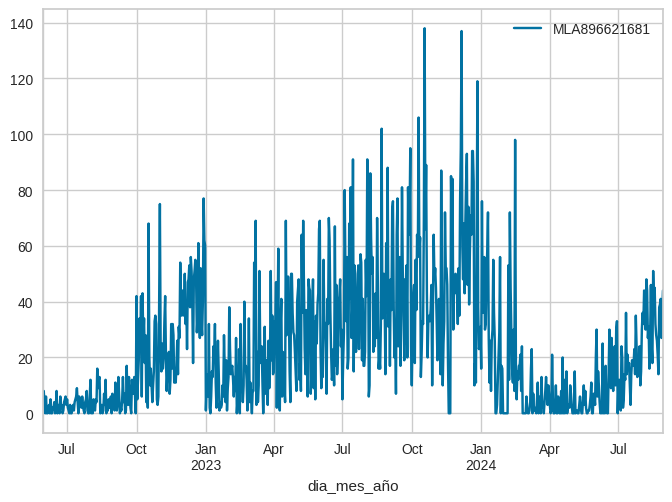

In [51]:
# plot the dataset
df.plot(x="dia_mes_año", y=["MLA896621681"])

In [62]:
# extract month and year from dates
df['Dia'] = [i.day for i in df['dia_mes_año']]
df['Mes'] = [i.month for i in df['dia_mes_año']]
df['Año'] = [i.year for i in df['dia_mes_año']]

# create a sequence of numbers
df['Series'] = np.arange(1,len(df)+1)

# drop unnecessary columns and re-arrange
df.drop(['dia_mes_año'], axis=1, inplace=True)
df = df[['Series', 'Año', 'Mes', 'Dia', 'MLA896621681']]

# check the head of the dataset**
df.head()

,Series,Año,Mes,Dia,MLA896621681
0,1,2022,5,30,7
1,2,2022,5,31,8
2,3,2022,6,1,4
3,4,2022,6,2,0
4,5,2022,6,3,6


In [63]:
# Iniciar pycaret.
from pycaret.time_series import *
s = setup(df,target= 'MLA896621681', seasonal_period=365)

,Description,Value
0,session_id,5558
1,Target,MLA896621681
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(823, 5)"
5,Transformed data shape,"(823, 5)"
6,Transformed train set shape,"(822, 5)"
7,Transformed test set shape,"(1, 5)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [64]:
# Crear y comparar modelos
modelos_comparados = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.1577,0.1074,2.3032,2.3032,0.0630,0.0605,0.2600
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.3392,0.2309,4.9546,4.9546,0.1430,0.1467,0.6400
croston,Croston,0.4278,0.2913,6.2482,6.2482,0.1776,0.1868,0.0467
arima,ARIMA,0.4346,0.2958,6.3454,6.3454,0.2059,0.1880,0.3300
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.4389,0.2988,6.4090,6.4090,0.2073,0.1901,0.1000
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.4419,0.3009,6.4529,6.4529,0.2082,0.1915,0.1167
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.4419,0.3009,6.4529,6.4529,0.2082,0.1915,0.1267
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.4446,0.3027,6.4924,6.4924,0.2089,0.1928,0.3767
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.4456,0.3033,6.5060,6.5060,0.2092,0.1933,0.2400
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.4525,0.3081,6.6074,6.6074,0.2103,0.1968,0.3167


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [65]:
best = create_model('xgboost_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,818.0000,0.3142,0.2139,4.5914,4.5914,0.1120,0.1060
1,819.0000,0.0882,0.0600,1.2871,1.2871,0.0477,0.0466
2,820.0000,0.0706,0.0481,1.0310,1.0310,0.0295,0.0290
Mean,nan,0.1577,0.1074,2.3032,2.3032,0.0630,0.0605
SD,nan,0.1109,0.0755,1.6214,1.6214,0.0354,0.0330


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
plot_model(best)

In [67]:
predicciones = predict_model(best, fh=30, X=df)

In [68]:
print(predicciones)

      y_pred
822  27.1763
823  21.0263
824  28.0781
825  20.6627
826  30.1440
827  15.8537
828  18.7079
829  23.5290
830  19.5601
831  19.8404
832  24.1424
833  19.5980
834  19.8783
835  24.1802
836  19.6358
837  19.9162
838  24.2181
839  19.6737
840  19.9540
841  24.2560
842  19.7116
843  19.9919
844  24.2938
845  19.7494
846  20.0298
847  24.3317
848  19.7873
849  20.0676
850  24.3696
851  19.8252


In [69]:
# Ajustar el mejor modelo
modelo_ajustado = finalize_model(best)

In [70]:
# Generar datos para 30 dias a futuro
future_dates = pd.date_range(start='2024-08-29', periods=30, freq='D')
future_df = pd.DataFrame({'dia_mes_año': future_dates})

In [77]:
# Forecast para 30 dias futuros
predict_model(best, fh = 30)

,y_pred
822,27.1763
823,21.0263
824,28.0781
825,20.6627
826,30.1440
827,15.8537
828,18.7079
829,23.5290
830,19.5601
831,19.8404


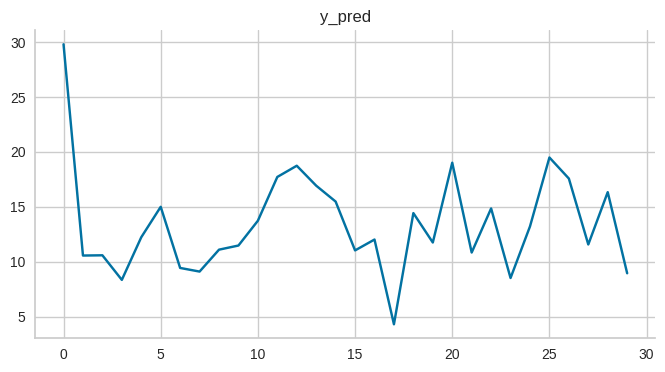

In [72]:
from matplotlib import pyplot as plt
_df_6['y_pred'].plot(kind='line', figsize=(8, 4), title='y_pred')
plt.gca().spines[['top', 'right']].set_visible(False)

In [81]:
# plot forecast
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

In [82]:
# Guardar el modelo ganador (
save_model(best, '/content/drive/MyDrive/Fundamentos/forecast_diario_MLA896621681')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                                                                                    n_jobs=1)],
                                                                                     regressor=XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              e...
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_chi

In [83]:
# Cargar modelo
final_catboost_model_loaded = load_model('/content/drive/MyDrive/Fundamentos/forecast_diario_MLA896621681')

Transformation Pipeline and Model Successfully Loaded
